# Titanic Survive Classification

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action="ignore")

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv("data/titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.isnull().sum()*100/titanic.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [4]:
lst = []
for i in range(titanic.shape[0]):
    txt = titanic.Name.iloc[i]
    arr = txt.split(",")
    lst.append(arr[0])
    
titanic["family_name"] = lst

In [5]:
titanic.family_name[titanic.Age.isnull()]

5              Moran
17          Williams
19        Masselmani
26              Emir
28           O'Dwyer
           ...      
859             Razi
863             Sage
868    van Melkebeke
878           Laleff
888         Johnston
Name: family_name, Length: 177, dtype: object

In [6]:
titanic.Age.mean()

29.69911764705882

In [7]:
titanic[["Name","Age"]][titanic.family_name == "Boulos"]

,Name,Age
140,"Boulos, Mrs. Joseph (Sultana)",NaN
598,"Boulos, Mr. Hanna",NaN
852,"Boulos, Miss. Nourelain",9.0


In [8]:
result_sum = 0
lst = []
for i,indis in zip(titanic.family_name[titanic.Age.isnull()],titanic.family_name[titanic.Age.isnull()].index):
    dummy = titanic[["Name","Age"]][titanic.family_name == i]
    if dummy.Age.isnull().sum() == len(dummy):
        result_sum = result_sum + 1
        lst.append(indis)

In [9]:
for i in lst:
    titanic.Age.iloc[i] = titanic.Age.mean()

In [10]:
result_sum

154

In [11]:
titanic.Age.fillna(titanic.Age.mean(),inplace = True)

In [12]:
df = pd.get_dummies(titanic.Sex)
titanic["is_female"] = df.female
titanic["is_male"] = df.male
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,is_female,is_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,Montvila,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Graham,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,Johnston,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Behr,0,1


In [13]:
lst =[]
for i in range(titanic.shape[0]):
    txt = titanic.Ticket.iloc[i]
    if txt == "LINE":
        txt = "0"
    df = txt.split(" ")
    if len(df) == 2:
        lst.append(df[1])
    elif len(df)>2:
        lst.append(df[2])
    else:
        lst.append(df[0])
        
titanic["new_ticket"] = lst
titanic["new_ticket"] = titanic.new_ticket.astype('float64')

In [14]:
titanic.Cabin.isnull().sum()*100/titanic.shape[0]

77.10437710437711

In [15]:
fam_nam_no_cabin = titanic.family_name[titanic.Cabin.isnull()].unique()

In [16]:
#for i in fam_nam_no_cabin:
 #   df = titanic[["Name","Cabin"]][titanic.family_name == i]
  #  print(df)

In [17]:
del titanic["Cabin"]

In [18]:
df = pd.get_dummies(titanic.Embarked)

In [19]:
titanic["Cherbourg"] = df["C"]
titanic["Queenstown"] = df["Q"]
titanic["Southampton"] = df["S"]

In [20]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  family_name  891 non-null    object 
 12  is_female    891 non-null    uint8  
 13  is_male      891 non-null    uint8  
 14  new_ticket   891 non-null    float64
 15  Cherbourg    891 non-null    uint8  
 16  Queenstown   891 non-null    uint8  
 17  Southampton  891 non-null    uint8  
dtypes: float64(3), int64(5), object(5), uint8(5)
memor

In [21]:
titanic_new = titanic.select_dtypes(exclude=['object'])

In [22]:
titanic_new = titanic_new.drop(columns = "PassengerId")

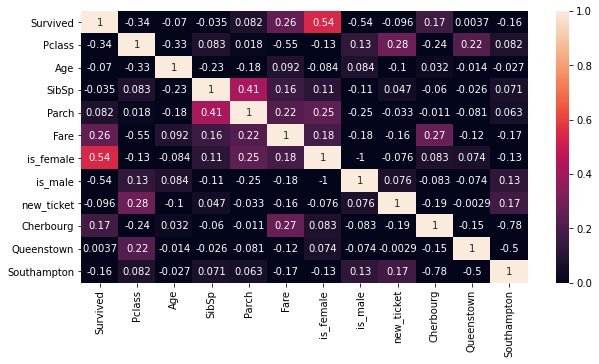

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(titanic_new.corr(),vmin=0,vmax=1,annot = True)

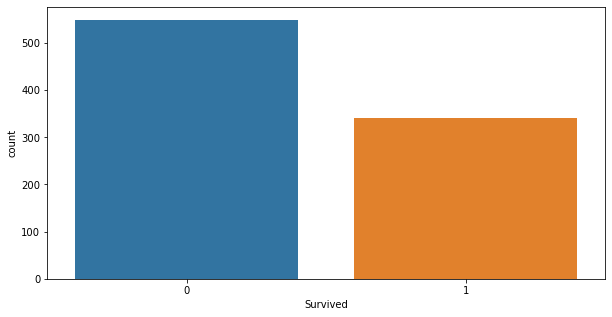

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(titanic.Survived)
plt.show()

# X and Y

In [25]:
X = titanic_new.drop(columns = "Survived")
y = titanic_new.Survived

# X_pf

In [26]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [27]:
poly = PolynomialFeatures(2)
X_pf = pd.DataFrame(poly.fit_transform(X),columns = poly.get_feature_names(X.columns))
X_pf.drop(columns = "1",inplace=True)
X_pf

,Pclass,Age,SibSp,Parch,Fare,is_female,is_male,new_ticket,Cherbourg,Queenstown,...,new_ticket^2,new_ticket Cherbourg,new_ticket Queenstown,new_ticket Southampton,Cherbourg^2,Cherbourg Queenstown,Cherbourg Southampton,Queenstown^2,Queenstown Southampton,Southampton^2
0,3.0,22.000000,1.0,0.0,7.2500,0.0,1.0,21171.0,0.0,0.0,...,4.482112e+08,0.0,0.0,21171.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,38.000000,1.0,0.0,71.2833,1.0,0.0,17599.0,1.0,0.0,...,3.097248e+08,17599.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3.0,26.000000,0.0,0.0,7.9250,1.0,0.0,3101282.0,0.0,0.0,...,9.617950e+12,0.0,0.0,3101282.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,35.000000,1.0,0.0,53.1000,1.0,0.0,113803.0,0.0,0.0,...,1.295112e+10,0.0,0.0,113803.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.0,35.000000,0.0,0.0,8.0500,0.0,1.0,373450.0,0.0,0.0,...,1.394649e+11,0.0,0.0,373450.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2.0,27.000000,0.0,0.0,13.0000,0.0,1.0,211536.0,0.0,0.0,...,4.474748e+10,0.0,0.0,211536.0,0.0,0.0,0.0,0.0,0.0,1.0
887,1.0,19.000000,0.0,0.0,30.0000,1.0,0.0,112053.0,0.0,0.0,...,1.255587e+10,0.0,0.0,112053.0,0.0,0.0,0.0,0.0,0.0,1.0
888,3.0,29.699118,1.0,2.0,23.4500,1.0,0.0,6607.0,0.0,0.0,...,4.365245e+07,0.0,0.0,6607.0,0.0,0.0,0.0,0.0,0.0,1.0
889,1.0,26.000000,0.0,0.0,30.0000,0.0,1.0,111369.0,1.0,0.0,...,1.240305e+10,111369.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [28]:
dum = X_pf.copy()
dum["target"]= y
corr = dum.corr()

In [29]:
pf = pd.DataFrame(corr.target, index=corr.target.index)

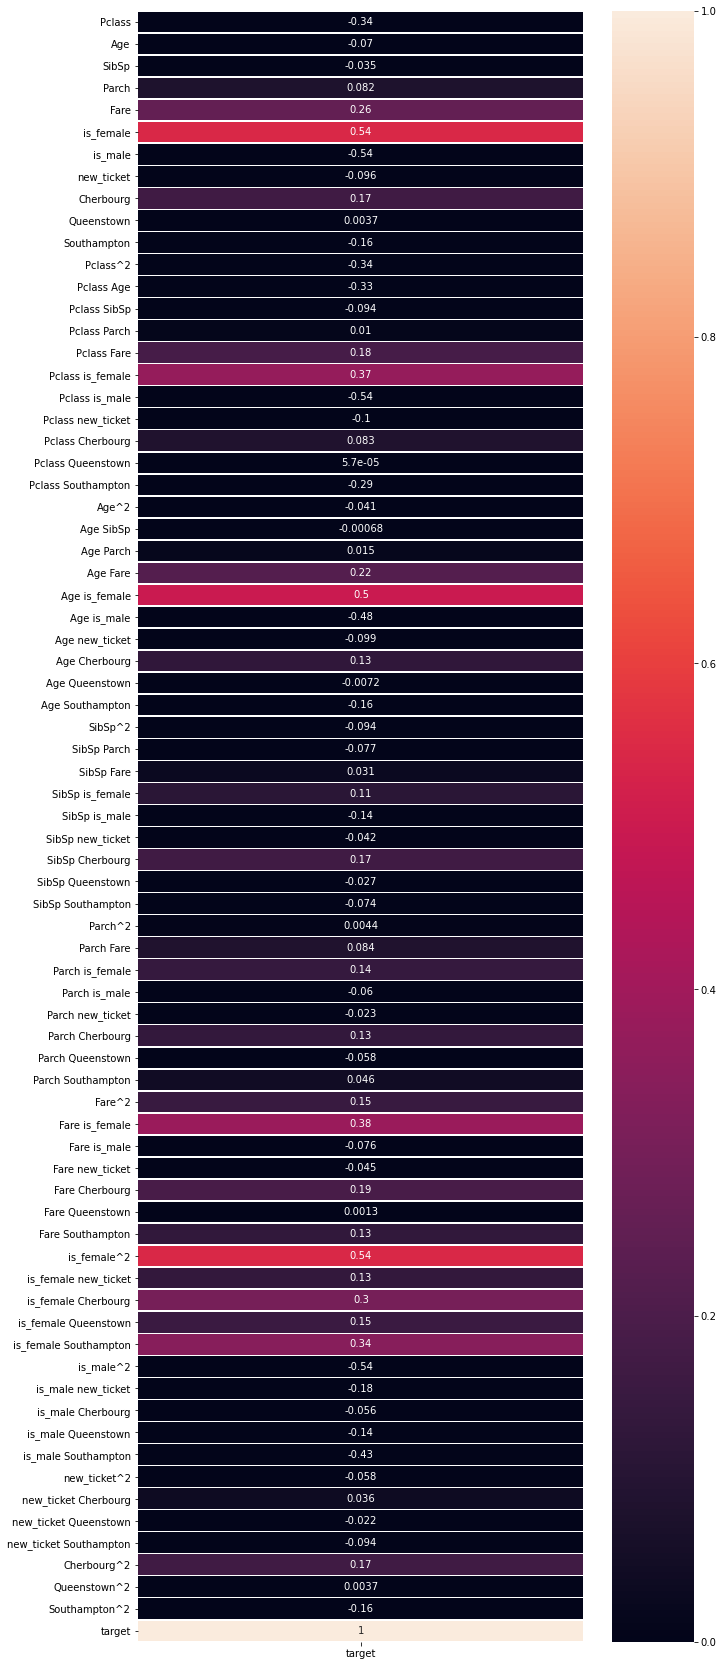

In [30]:
plt.figure(figsize=(10,30))
sns.heatmap(pf.dropna(),vmin=0,vmax=1,annot = True,linewidths=0.5)

# X_pf_pca

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [32]:
X_sta = StandardScaler().fit_transform(X_pf)
pca = PCA(n_components=10)
pca.fit(X_sta)

print(np.cumsum(pca.explained_variance_ratio_))

[0.16757755 0.31358134 0.42719063 0.52626214 0.60820158 0.67156305
 0.72432072 0.76357076 0.79000533 0.81180673]


In [33]:
X_sta = StandardScaler().fit_transform(X_pf)
pca = PCA(n_components=10)
X_pf_pca = pca.fit_transform(X_sta)
X_pf_pca = pd.DataFrame(X_pf_pca)
X_pf_pca

,0,1,2,3,4,5,6,7,8,9
0,-2.546565,1.136920,0.694061,0.306630,-1.275497,-1.544410,-0.811600,-0.689355,0.805612,-0.085721
1,5.114679,-4.682781,1.106519,-0.697311,2.403572,-0.644414,-2.006519,1.519239,-0.268658,-2.628307
2,-0.290948,4.217389,-5.207312,-3.814283,8.189938,2.104200,-0.647236,0.553154,-0.287868,3.023635
3,2.902488,0.381002,-0.368270,-3.230769,-0.904603,1.160116,-2.283231,0.538684,-1.645641,0.049139
4,-3.621063,0.749494,0.494973,-0.619330,-0.461330,-0.184681,0.413348,0.505356,1.322733,-0.178676
...,...,...,...,...,...,...,...,...,...,...
886,-2.647273,0.094580,0.990126,-0.784336,-0.830091,-0.040772,-0.206976,-0.823877,-0.482037,-0.500635
887,1.740882,-0.489045,-0.895192,-3.490762,-0.545563,0.191890,-1.492867,-1.613232,-2.038681,0.068299
888,4.527614,3.253915,-1.684090,-2.220984,-1.425470,-1.392853,2.613140,0.522855,1.145838,0.520474
889,-0.035681,-4.547472,2.388456,1.370745,1.852436,-1.496256,0.179152,-0.188426,-2.634611,1.782609


# Logistic Regression

* **One Vs. Rest**

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
log_reg = LogisticRegression()

In [37]:
params = {"C":[10**x for x in range(-5,5)], "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [38]:
grid = GridSearchCV(estimator=log_reg,param_grid=params,cv=5,return_train_score=True)

In [39]:
grid.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             return_train_score=True)

In [40]:
df = pd.DataFrame()
df["params"] = grid.cv_results_["params"]
df["mean_test_score"] = grid.cv_results_["mean_test_score"]
df["mean_train_score"] = grid.cv_results_["mean_train_score"]
df["sub"] = pd.DataFrame( df["mean_train_score"].to_numpy()- df["mean_test_score"].to_numpy())
df.sort_values(by = "sub" ,ascending = True)

,params,mean_test_score,mean_train_score,sub
7,"{'C': 0.0001, 'solver': 'liblinear'}",0.684697,0.682666,-0.002030
5,"{'C': 0.0001, 'solver': 'newton-cg'}",0.665602,0.664710,-0.000891
24,"{'C': 0.1, 'solver': 'saga'}",0.616163,0.616162,-0.000002
44,"{'C': 1000, 'solver': 'saga'}",0.616163,0.616162,-0.000002
43,"{'C': 1000, 'solver': 'sag'}",0.616163,0.616162,-0.000002
39,"{'C': 100, 'solver': 'saga'}",0.616163,0.616162,-0.000002
38,"{'C': 100, 'solver': 'sag'}",0.616163,0.616162,-0.000002
34,"{'C': 10, 'solver': 'saga'}",0.616163,0.616162,-0.000002
33,"{'C': 10, 'solver': 'sag'}",0.616163,0.616162,-0.000002
29,"{'C': 1, 'solver': 'saga'}",0.616163,0.616162,-0.000002


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
log_reg = LogisticRegression(C = 0.1, solver='newton-cg')
log_reg.fit(X_train,y_train)

LogisticRegression(C=0.1, solver='newton-cg')

In [43]:
pred_y_test = log_reg.predict(X_test)
pred_y_train = log_reg.predict(X_train)

In [44]:
print(classification_report(pred_y_test,y_test))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.73      0.77      0.75        70

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [45]:
print(classification_report(pred_y_train,y_train))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       474
           1       0.68      0.76      0.72       238

    accuracy                           0.80       712
   macro avg       0.78      0.79      0.78       712
weighted avg       0.81      0.80      0.80       712



In [46]:
log_reg = LogisticRegression()
params = {"C":[10**x for x in range(-5,5)], "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [47]:
grid = GridSearchCV(estimator=log_reg,param_grid=params,cv=5,return_train_score=True)

In [48]:
grid.fit(X_pf_pca,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             return_train_score=True)

In [49]:
df = pd.DataFrame()
df["params"] = grid.cv_results_["params"]
df["mean_test_score"] = grid.cv_results_["mean_test_score"]
df["mean_train_score"] = grid.cv_results_["mean_train_score"]
df["sub"] = pd.DataFrame( df["mean_train_score"].to_numpy()- df["mean_test_score"].to_numpy())
df.sort_values(by = "sub" ,ascending = True)

,params,mean_test_score,mean_train_score,sub
8,"{'C': 0.0001, 'solver': 'sag'}",0.622899,0.622055,-0.000843
9,"{'C': 0.0001, 'solver': 'saga'}",0.622899,0.622055,-0.000843
6,"{'C': 0.0001, 'solver': 'lbfgs'}",0.622899,0.622055,-0.000843
5,"{'C': 0.0001, 'solver': 'newton-cg'}",0.622899,0.622055,-0.000843
0,"{'C': 1e-05, 'solver': 'newton-cg'}",0.616163,0.616162,-0.000002
3,"{'C': 1e-05, 'solver': 'sag'}",0.616163,0.616162,-0.000002
1,"{'C': 1e-05, 'solver': 'lbfgs'}",0.616163,0.616162,-0.000002
4,"{'C': 1e-05, 'solver': 'saga'}",0.616163,0.616162,-0.000002
7,"{'C': 0.0001, 'solver': 'liblinear'}",0.774440,0.779180,0.004740
12,"{'C': 0.001, 'solver': 'liblinear'}",0.778915,0.784512,0.005597


In [50]:
log_reg = LogisticRegression(C= 0.01, solver = 'sag')

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=0.01, solver='sag')

In [53]:
pred_y_test = log_reg.predict(X_test)
pred_y_train = log_reg.predict(X_train)

In [54]:
print(classification_report(pred_y_test,y_test))

              precision    recall  f1-score   support

           0       1.00      0.59      0.74       179
           1       0.00      0.00      0.00         0

    accuracy                           0.59       179
   macro avg       0.50      0.29      0.37       179
weighted avg       1.00      0.59      0.74       179



In [55]:
print(classification_report(pred_y_train,y_train))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77       712
           1       0.00      0.00      0.00         0

    accuracy                           0.62       712
   macro avg       0.50      0.31      0.38       712
weighted avg       1.00      0.62      0.77       712



# K-nearest Neigbours

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn = KNeighborsClassifier()

In [58]:
params = {"n_neighbors":range(2,12)}

In [59]:
grid_knn = GridSearchCV(estimator = knn,param_grid=params,verbose = True,cv =3,return_train_score=True,scoring = "f1")

In [60]:
grid_knn.fit(X_pf_pca,y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.3s finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 12)}, return_train_score=True,
             scoring='f1', verbose=True)

In [61]:
df = pd.DataFrame()
df["params"] = grid_knn.cv_results_["params"]
df["mean_test_score"] = grid_knn.cv_results_["mean_test_score"]
df["mean_train_score"] = grid_knn.cv_results_["mean_train_score"]
df["sub"] = pd.DataFrame( df["mean_train_score"].to_numpy()- df["mean_test_score"].to_numpy())
df.sort_values(by = "sub" ,ascending = True)

,params,mean_test_score,mean_train_score,sub
8,{'n_neighbors': 10},0.721550,0.761141,0.039591
9,{'n_neighbors': 11},0.728565,0.769140,0.040575
6,{'n_neighbors': 8},0.714635,0.767347,0.052712
7,{'n_neighbors': 9},0.726981,0.783816,0.056835
4,{'n_neighbors': 6},0.711867,0.781624,0.069756
5,{'n_neighbors': 7},0.707665,0.793038,0.085372
2,{'n_neighbors': 4},0.699604,0.789757,0.090154
3,{'n_neighbors': 5},0.713027,0.808677,0.095651
1,{'n_neighbors': 3},0.706648,0.841896,0.135248
0,{'n_neighbors': 2},0.638090,0.829591,0.191501


In [62]:
knn = KNeighborsClassifier(n_neighbors= 10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [63]:
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

In [64]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80       374
           1       0.70      0.42      0.52       222

    accuracy                           0.72       596
   macro avg       0.71      0.66      0.66       596
weighted avg       0.71      0.72      0.70       596



In [65]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74       175
           1       0.61      0.41      0.49       120

    accuracy                           0.65       295
   macro avg       0.64      0.62      0.61       295
weighted avg       0.65      0.65      0.64       295



# Decision Trees

In [66]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [67]:
decision_tree = DecisionTreeClassifier(random_state=42,criterion="entropy")

In [68]:
params = {"max_depth" : [x for x in range(1,6)]}

In [69]:
grid_dec = GridSearchCV(estimator = decision_tree,param_grid=params,verbose = True,cv =3,return_train_score=True,scoring = "f1")

In [70]:
grid_dec.fit(X,y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5]}, return_train_score=True,
             scoring='f1', verbose=True)

In [71]:
df = pd.DataFrame()
df["params"] = grid_dec.cv_results_["params"]
df["mean_test_score"] = grid_dec.cv_results_["mean_test_score"]
df["mean_train_score"] = grid_dec.cv_results_["mean_train_score"]
df["sub"] = pd.DataFrame( df["mean_train_score"].to_numpy()- df["mean_test_score"].to_numpy())
df.sort_values(by = "sub" ,ascending = True)

,params,mean_test_score,mean_train_score,sub
0,{'max_depth': 1},0.709702,0.710205,0.000503
2,{'max_depth': 3},0.731292,0.747348,0.016056
1,{'max_depth': 2},0.666501,0.701666,0.035165
4,{'max_depth': 5},0.739459,0.796777,0.057318
3,{'max_depth': 4},0.690715,0.766094,0.075380


In [72]:
decision_tree = DecisionTreeClassifier(random_state=42,criterion="entropy",max_depth=3)

In [73]:
decision_tree.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
y_pred_test = decision_tree.predict(X_test)
y_pred_train = decision_tree.predict(X_train)

In [76]:
print(classification_report(pred_y_test,y_test))

              precision    recall  f1-score   support

           0       1.00      0.59      0.74       179
           1       0.00      0.00      0.00         0

    accuracy                           0.59       179
   macro avg       0.50      0.29      0.37       179
weighted avg       1.00      0.59      0.74       179



In [77]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



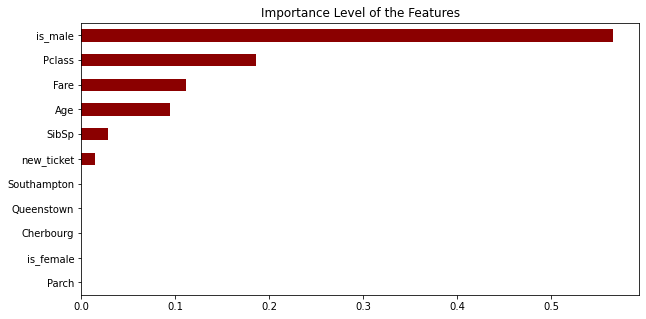

In [78]:
importance_level = pd.Series(data=decision_tree.feature_importances_,
                        index= X_train.columns)

importance_level_sorted = importance_level.sort_values()
plt.figure(figsize=(10,5))
importance_level_sorted.plot(kind='barh', color='darkred')
plt.title('Importance Level of the Features')
plt.show()

# Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42,criterion = "entropy")

In [80]:
params = {"n_estimators": [x for x in range(1,10,1)],"max_depth":[3,4,5,6]}

In [81]:
grid_rand = GridSearchCV(estimator = random_forest,param_grid=params,verbose = True,cv =3,return_train_score=True,scoring = "f1")

In [82]:
grid_rand.fit(X,y)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    2.4s finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             return_train_score=True, scoring='f1', verbose=True)

In [83]:
df = pd.DataFrame()
df["params"] = grid_rand.cv_results_["params"]
df["mean_test_score"] = grid_rand.cv_results_["mean_test_score"]
df["mean_train_score"] = grid_rand.cv_results_["mean_train_score"]
df["sub"] = pd.DataFrame( df["mean_train_score"].to_numpy()- df["mean_test_score"].to_numpy())
df.sort_values(by = "sub" ,ascending = True)

,params,mean_test_score,mean_train_score,sub
0,"{'max_depth': 3, 'n_estimators': 1}",0.706756,0.717255,0.010499
4,"{'max_depth': 3, 'n_estimators': 5}",0.706274,0.731589,0.025315
1,"{'max_depth': 3, 'n_estimators': 2}",0.703618,0.729135,0.025516
3,"{'max_depth': 3, 'n_estimators': 4}",0.707427,0.736599,0.029172
2,"{'max_depth': 3, 'n_estimators': 3}",0.695985,0.730763,0.034777
8,"{'max_depth': 3, 'n_estimators': 9}",0.716749,0.752781,0.036032
7,"{'max_depth': 3, 'n_estimators': 8}",0.711302,0.749945,0.038643
14,"{'max_depth': 4, 'n_estimators': 6}",0.708671,0.750432,0.041761
6,"{'max_depth': 3, 'n_estimators': 7}",0.699063,0.742058,0.042995
13,"{'max_depth': 4, 'n_estimators': 5}",0.698001,0.745646,0.047645


In [84]:
random_forest = RandomForestClassifier(random_state=42,criterion = "entropy",max_depth = 3, n_estimators= 1)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=1,
                       random_state=42)

In [87]:
y_pred_test = random_forest.predict(X_test)
y_pred_train = random_forest.predict(X_train)

In [88]:
print(classification_report(pred_y_test,y_test))

              precision    recall  f1-score   support

           0       1.00      0.59      0.74       179
           1       0.00      0.00      0.00         0

    accuracy                           0.59       179
   macro avg       0.50      0.29      0.37       179
weighted avg       1.00      0.59      0.74       179



In [89]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       105
           1       0.81      0.64      0.71        74

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.79      0.78       179



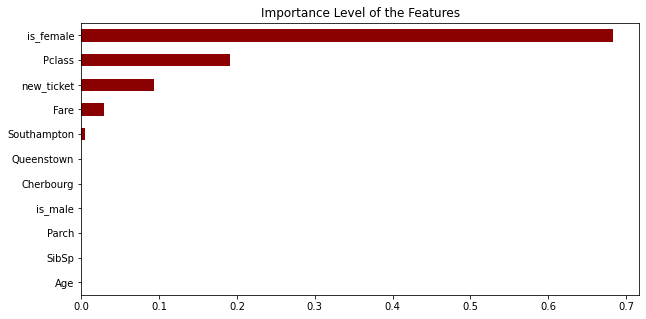

In [90]:
importance_level = pd.Series(data=random_forest.feature_importances_,
                        index= X_train.columns)

importance_level_sorted = importance_level.sort_values()
plt.figure(figsize=(10,5))
importance_level_sorted.plot(kind='barh', color='darkred')
plt.title('Importance Level of the Features')
plt.show()

# SVM

In [91]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [92]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)] 
             }

In [93]:
grid_svm = GridSearchCV(estimator = svc,param_grid=parameters,verbose = True,cv =3,return_train_score=True,scoring = "f1")

In [94]:
grid_svm.fit(X_pf_pca,y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.0s finished


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000]},
             return_train_score=True, scoring='f1', verbose=True)

In [95]:
df = pd.DataFrame()
df["params"] = grid_svm.cv_results_["params"]
df["mean_test_score"] = grid_svm.cv_results_["mean_test_score"]
df["mean_train_score"] = grid_svm.cv_results_["mean_train_score"]
df["sub"] = pd.DataFrame( df["mean_train_score"].to_numpy()- df["mean_test_score"].to_numpy())
df.sort_values(by = "sub" ,ascending = True)

,params,mean_test_score,mean_train_score,sub
0,{'C': 1e-05},0.000000,0.000000,0.000000
1,{'C': 0.0001},0.000000,0.000000,0.000000
2,{'C': 0.001},0.000000,0.000000,0.000000
3,{'C': 0.01},0.000000,0.000000,0.000000
4,{'C': 0.1},0.678319,0.701075,0.022756
5,{'C': 1},0.734589,0.759784,0.025195
6,{'C': 10},0.729999,0.799292,0.069293
7,{'C': 100},0.713182,0.834951,0.121769
8,{'C': 1000},0.675099,0.865050,0.189951
9,{'C': 10000},0.679369,0.893212,0.213843


In [96]:
svc = SVC(random_state=42,C=1)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
svc.fit(X_train,y_train)

SVC(C=1, random_state=42)

In [99]:
y_pred_test = svc.predict(X_test)
y_pred_train = svc.predict(X_train)

In [100]:
print(classification_report(pred_y_test,y_test))

              precision    recall  f1-score   support

           0       1.00      0.59      0.74       179
           1       0.00      0.00      0.00         0

    accuracy                           0.59       179
   macro avg       0.50      0.29      0.37       179
weighted avg       1.00      0.59      0.74       179



In [101]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       0.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.34      0.59      0.43       179



# XGB Classification

In [102]:
from xgboost import XGBClassifier

In [103]:
model = XGBClassifier(objective= "binary:logistic",random_state= 42)

In [104]:
parameters = { "colsample_bytree":np.transpose([x for x in np.arange(0.1,1.1,0.1)]),"gamma":np.transpose([x for x in np.arange(0.1,0.6,0.1)]), "learning_rate":np.transpose([x for x in np.arange(0.1,0.6,0.1)]),"min_child_weight":np.transpose([x for x in np.arange(3,8,1)]),"max_depth":np.transpose([x for x in np.arange(2,4,1)]),"n_estimators":range(50,70,10)}

In [105]:
grid_cv = GridSearchCV(estimator = model,
                       param_grid = parameters,
                       cv = 5,
                       verbose=True,
                       n_jobs = -1,
                       return_train_score = True,
                       scoring = "f1"
                      )

In [106]:
#grid_cv.fit(X,y)

In [107]:
#df = pd.DataFrame()
#df["params"] = grid_cv.cv_results_["params"]
#df["mean_test_score"] = grid_cv.cv_results_["mean_test_score"]
#df["mean_train_score"] = grid_cv.cv_results_["mean_train_score"]
#df["sub"] = abs(df.mean_train_score.to_numpy()-df.mean_test_score.to_numpy())

In [108]:
#df.sort_values(by='sub', ascending=True,inplace=True)
#df[:10]

In [109]:
#df.params.iloc[0]

In [110]:
model = XGBClassifier(objective= "binary:logistic",colsample_bytree=  0.7,gamma= 0.1,learning_rate = 0.1,max_depth= 2,min_child_weight= 6,n_estimators=60)

In [111]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       712 non-null    int64  
 1   Age          712 non-null    float64
 2   SibSp        712 non-null    int64  
 3   Parch        712 non-null    int64  
 4   Fare         712 non-null    float64
 5   is_female    712 non-null    uint8  
 6   is_male      712 non-null    uint8  
 7   new_ticket   712 non-null    float64
 8   Cherbourg    712 non-null    uint8  
 9   Queenstown   712 non-null    uint8  
 10  Southampton  712 non-null    uint8  
dtypes: float64(3), int64(3), uint8(5)
memory usage: 42.4 KB


In [113]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=60, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [114]:
model.score(X_train,y_train)

0.851123595505618

In [115]:
model.score(X_test,y_test)

0.8324022346368715

In [116]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [117]:


print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       105
           1       0.88      0.69      0.77        74

    accuracy                           0.83       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.83      0.83       179



In [118]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       444
           1       0.91      0.68      0.77       268

    accuracy                           0.85       712
   macro avg       0.87      0.82      0.83       712
weighted avg       0.86      0.85      0.85       712



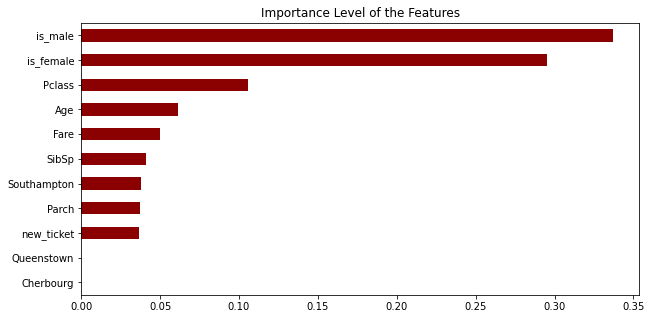

In [119]:
importance_level = pd.Series(data=model.feature_importances_,
                        index= X_train.columns)

importance_level_sorted = importance_level.sort_values()
plt.figure(figsize=(10,5))
importance_level_sorted.plot(kind='barh', color='darkred')
plt.title('Importance Level of the Features')
plt.show()

In [120]:
#joblib

In [121]:
import joblib

In [122]:
joblib.dump(model,"xgb.joblib")

['xgb.joblib']

In [123]:
joblib.dump(svc,"svc.joblib")

['svc.joblib']

In [124]:
joblib.dump(decision_tree,"dt.joblib")

['dt.joblib']

In [125]:
joblib.dump(random_forest,"rf.joblib")

['rf.joblib']

In [126]:
joblib.dump(knn,"knn.joblib")

['knn.joblib']

In [127]:
joblib.dump(log_reg,"log_reg.joblib")

['log_reg.joblib']

In [128]:
joblib.dump(pca,"pca.joblib")

['pca.joblib']